In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_churn_model.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df2 = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df2.shape

(10000, 11)

In [4]:
df2.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
columns_to_scale = ['CreditScore','Age','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
df3 =df2.copy()
df3[columns_to_scale] = MinMaxScaler().fit_transform(df3[columns_to_scale])
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,2,0.500246,1,1,1,0.395400,0


In [7]:
df3.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
df3.CreditScore.sum()

6010.576

In [36]:
churned_0 = df3[df3.Exited == 0].groupby('Geography')['Exited'].count()
churned_1 = df3[df3.Exited == 1].groupby('Geography')['Exited'].count()
print(churned_0,churned_1)

Geography
France     4204
Germany    1695
Spain      2064
Name: Exited, dtype: int64 Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


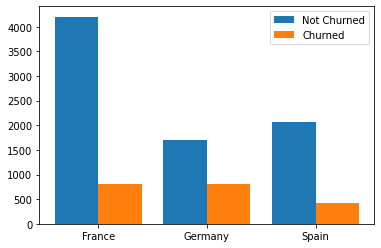

In [58]:
import numpy as np
x = np.arange(3)
plt.bar(x,churned_0,width=0.4,label='Not Churned')
plt.bar(x+0.4,churned_1,width=0.4,label='Churned')
plt.xticks(x+0.2,['France','Germany','Spain'])
plt.legend()
plt.show()

In [59]:
df4 = pd.get_dummies(df3,drop_first=True)
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,1,0


In [61]:
df4.shape

(10000, 12)

<h3> My data set is ready,<br>
    Let's start feeding the data to machine</h3>

In [60]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
def ANN(X_train,X_test,y_train,y_test,loss='binary_crossentropy',weights=-1):
    model = keras.Sequential([
        keras.layers.Dense(11,input_dim = 11,activation='relu'),
        keras.layers.Dense(7,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,weights=weights)
    
    print(model.evaluate(X_test,y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification Report is:")
    print(classification_report(y_test,y_pred))
    
    return y_pred

In [63]:
from sklearn.model_selection import train_test_split
X = df4.drop('Exited',axis=1)
y = df4.Exited

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [71]:
y_pred = ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.9461 - accuracy: 0.6465
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4661 - accuracy: 0.7995
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.8049
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.8076
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8100
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4390 - accuracy: 0.8126
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.8155
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8161
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4286 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8604
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8611
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8601
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3388 - accuracy: 0.8619
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8605
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8616
Epoch 87/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3363 - accuracy: 0.8621
Epoch 88/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8605
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8590
Epoch 90/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 

<h3> Under sampling</h3>

In [76]:
df_exited = df4[df.Exited==1]
df_not_exited = df4[df.Exited==0]
no_df_exited = df_exited.shape[0]
no_df_not_exited = df_not_exited.shape[0]
df_exited.shape,df_not_exited.shape

((2037, 12), (7963, 12))

In [83]:
X = pd.concat([df_exited,df_not_exited.sample(no_df_exited)],axis=0)
X.shape

(4074, 12)

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X.drop('Exited',axis=1),X.Exited,random_state=5,test_size=0.2)
y_preds = ANN(X_train,X_test,y_train,y_test)

In [85]:
y_preds = ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.7290 - accuracy: 0.4968
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5410
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5805
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.6057
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6210
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6378 - accuracy: 0.6401
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6533
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.6591
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6695
Epoch 10/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6087 - accura

102/102 [==============================] - 1s 5ms/step - loss: 0.4833 - accuracy: 0.7600
Epoch 82/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4850 - accuracy: 0.7604
Epoch 83/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4839 - accuracy: 0.7631
Epoch 84/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.7662
Epoch 85/100
102/102 [==============================] - 1s 5ms/step - loss: 0.4839 - accuracy: 0.7604
Epoch 86/100
102/102 [==============================] - 1s 5ms/step - loss: 0.4828 - accuracy: 0.7628
Epoch 87/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.7668
Epoch 88/100
102/102 [==============================] - 1s 5ms/step - loss: 0.4804 - accuracy: 0.7597
Epoch 89/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.7640
Epoch 90/100
102/102 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 

<h3>method2: Oversampling</h3>

In [86]:
X = pd.concat([df_exited.sample(no_df_not_exited,replace=True,),df_not_exited],axis=0)
X.shape

(15926, 12)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X.drop('Exited',axis=1),X.Exited,random_state=5,test_size=0.2)
y_preds = ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6886 - accuracy: 0.5563
Epoch 2/100
399/399 [==============================] - 1s 4ms/step - loss: 0.6604 - accuracy: 0.6284
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6339 - accuracy: 0.6621
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6072 - accuracy: 0.6845
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5838 - accuracy: 0.6976
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5693 - accuracy: 0.7078
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5575 - accuracy: 0.7212
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5478 - accuracy: 0.7239
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5393 - accuracy: 0.7300
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5308 - accura

399/399 [==============================] - 2s 5ms/step - loss: 0.4551 - accuracy: 0.7830
Epoch 82/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4535 - accuracy: 0.7825
Epoch 83/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4535 - accuracy: 0.7810
Epoch 84/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4530 - accuracy: 0.7821
Epoch 85/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4532 - accuracy: 0.7834
Epoch 86/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4534 - accuracy: 0.7808
Epoch 87/100
399/399 [==============================] - 3s 6ms/step - loss: 0.4521 - accuracy: 0.7856
Epoch 88/100
399/399 [==============================] - 3s 7ms/step - loss: 0.4529 - accuracy: 0.7825
Epoch 89/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4522 - accuracy: 0.7845
Epoch 90/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4517 - accuracy: 

<h3> method 3: smote</h3>

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(df4.drop('Exited',axis=1),df4.Exited)
y_sm.value_countscounts()

0    7963
1    7963
Name: Exited, dtype: int64

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,random_state=5,test_size=0.2)
y_preds = ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6758 - accuracy: 0.5834
Epoch 2/100
399/399 [==============================] - 1s 4ms/step - loss: 0.6338 - accuracy: 0.6660
Epoch 3/100
399/399 [==============================] - 1s 4ms/step - loss: 0.6008 - accuracy: 0.6864
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5774 - accuracy: 0.7026
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5633 - accuracy: 0.7126
Epoch 6/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5563 - accuracy: 0.7188
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5515 - accuracy: 0.7203
Epoch 8/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5433 - accuracy: 0.7282
Epoch 9/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5364 - accuracy: 0.7344
Epoch 10/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5260 - accura

399/399 [==============================] - 2s 5ms/step - loss: 0.4067 - accuracy: 0.8104
Epoch 82/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4080 - accuracy: 0.8094
Epoch 83/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4074 - accuracy: 0.8123
Epoch 84/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4073 - accuracy: 0.8108
Epoch 85/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4061 - accuracy: 0.8115
Epoch 86/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4063 - accuracy: 0.8121
Epoch 87/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4087 - accuracy: 0.8118
Epoch 88/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4076 - accuracy: 0.8086
Epoch 89/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4063 - accuracy: 0.8093
Epoch 90/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4072 - accuracy: 